In [29]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
from math import *

In [30]:
mu = 0
mu2 = 0.5
mu3 = 0.75

In [31]:
variance = 0.5
variance2 = 1
variance3 = 1.5


In [32]:
sigma = math.sqrt(variance)
sigma2 = math.sqrt(variance2)
sigma3 = math.sqrt(variance3)


In [33]:
x = np.linspace(mu-3*variance,mu+3*variance, 40)
x2 = np.linspace(mu2-3*variance2, mu+3*variance2, 40)
x3 = np.linspace(mu2-3*variance3, mu+3*variance3, 40)


In [34]:
A = np.zeros((559,1))
A[20:60] = mlab.normpdf(x, mu, sigma).reshape(40,1)
A[230:270] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
A[420:460] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
A = A.reshape(559)


In [35]:
B = np.zeros((559,1))
B[23:63] = mlab.normpdf(x, mu, sigma).reshape(40,1)
B[400:440] =  mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
B[470:510] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
B = B.reshape(559)


In [36]:
C = np.zeros((559, 1))
C[320:360] = mlab.normpdf(x2, mu2, sigma2).reshape(40,1)
C[433:473] = mlab.normpdf(x, mu, sigma).reshape(40,1)
C[128:168] = mlab.normpdf(x3, mu3, sigma3).reshape(40,1)
C = C.reshape(559)

In [37]:
spectralmatrix = np.zeros((256, 256, 559))
functionalmatrix = np.zeros((256, 256))
Amatrix = np.zeros((256, 256))
Bmatrix = np.zeros((256, 256))
Cmatrix =np.zeros((256, 256))
xaxis = spectralmatrix.shape[0]
yaxis = spectralmatrix.shape[1]


In [38]:
#generating random coefficients
#creating a matrix with a spectrum at each point

np.random.seed(122)
a=np.random.rand(1)
b=np.random.rand(1)
c=np.random.rand(1)
spatialfrequency = (2*np.pi)/64
for x in range(xaxis):
    for y in range(yaxis):
        a = abs(np.sin(y*spatialfrequency))
        b = abs(np.sin(x*spatialfrequency) + np.sin(y*spatialfrequency))
        c = np.sin(x*spatialfrequency)**2
    #can make a, b, c as a function of x and y with some random noise
        spectralmatrix[x,y,:] = a*A + b*B + c*C
        functionalmatrix[x][y] = 2*a + b + 9*c
        Amatrix[x][y]=a
        Bmatrix[x][y]=b
        Cmatrix[x][y]=c

In [39]:
#creating a linear relating between the three matrices
pts=256
a=Amatrix
b=Bmatrix
c=Cmatrix
B0=0
B1=2
B2=1
B3=9
yactual=B0+B1*a+B2*b+B3*c
yactual=yactual.reshape(65536,1)

In [40]:
PCA_data=np.load('loadingsmatrix.npy')
PCA_data.shape

(9, 9)

In [41]:
projection_matrix=np.load('projectionmatrix.npy')
projection_matrix.shape

(65536, 9)

In [42]:
x=projection_matrix[:,0:3]
x.shape

(65536, 3)

In [43]:
regr=linear_model.LinearRegression()
s=regr.fit(x, yactual)
s.coef_[0], s.intercept_[0]

(array([ 1.34846668,  1.02055162,  0.86992429]), 6.582460988733378)

In [44]:
x1=projection_matrix[:,0:4]
x1.shape

(65536, 4)

In [45]:
regr=linear_model.LinearRegression()
s=regr.fit(x1, yactual)
s.coef_, s.intercept_

(array([[  1.34846668e+00,   1.02055162e+00,   8.69924290e-01,
           8.74953316e-15]]), array([ 6.58246099]))

In [46]:
x1=np.array(x1)
yactual=np.array(yactual)
x1.size, yactual.size
x1.resize(65536)
x1.size, yactual.size

(65536, 65536)

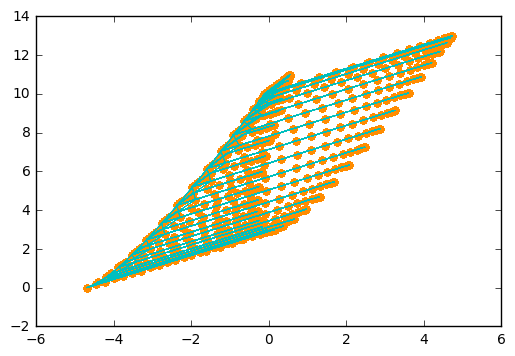

In [47]:
plt.scatter(x1,yactual, color='darkorange', lw=1)
plt.plot(x1,yactual, color='c', lw=0.5)
plt.show()

SVR USING A LINEAR KERNEL

In [48]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [49]:
yactual=np.ravel(yactual)#flattening to a column vector from a 1d array

In [50]:
svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(x, yactual).predict(x)

In [51]:
y_lin_coef=svr_lin.fit(x, yactual).coef_[0]
print(y_lin_coef)

[ 1.32773492  0.9923579   0.84916953]


In [52]:
y_lin_intercept=svr_lin.fit(x, yactual).intercept_[0]
print(y_lin_intercept)

6.58270927936


In [53]:
x1.size,y_lin.size

(65536, 65536)

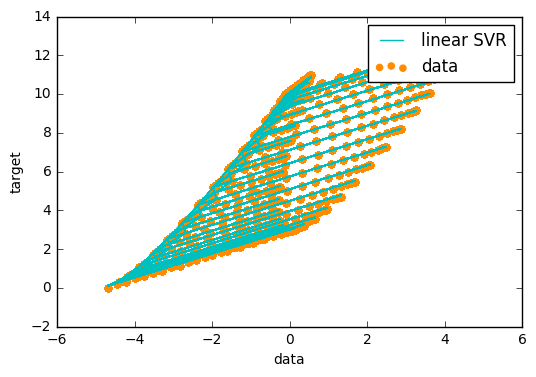

In [54]:
plt.scatter(x1,yactual, color='darkorange', lw=1, label='data')
plt.hold('on')
plt.plot(x1, y_lin, color='c', label='linear SVR')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()
#plt.plot(yactual, color='navy', lw=2)

FOR 4 PRINCIPAL COMPONENTS

In [55]:
x1=projection_matrix[:,0:4]
x1.shape

(65536, 4)

In [56]:
regr=linear_model.LinearRegression()
s=regr.fit(x1, yactual)
s.coef_, s.intercept_

(array([  1.34846668e+00,   1.02055162e+00,   8.69924290e-01,
          8.74953316e-15]), 6.582460988733378)

SVR

In [57]:
svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(x1, yactual).predict(x1)

In [58]:
y_lin_coef=svr_lin.fit(x1, yactual).coef_[0]
print(y_lin_coef)

[  1.32773492e+00   9.92357904e-01   8.49169532e-01   1.33523137e-14]


In [59]:
y_lin_intercept=svr_lin.fit(x, yactual).intercept_[0]
print(y_lin_intercept)

6.58270927936


In [60]:
x1=np.array(x1)
yactual=np.array(yactual)
x1.resize(65536)
x1.size, yactual.size

(65536, 65536)

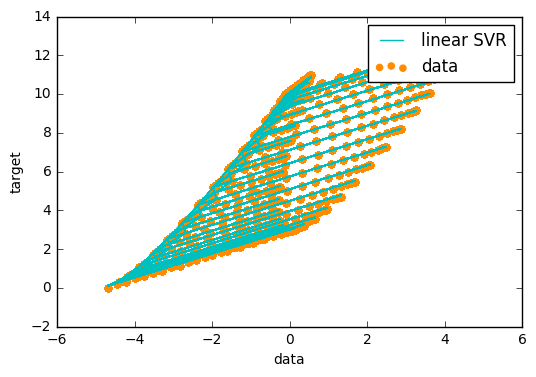

In [61]:
plt.scatter(x1,yactual, color='darkorange', lw=1, label='data')
plt.hold('on')
plt.plot(x1, y_lin, color='c', label='linear SVR')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()
plt.show()
#plt.plot(yactual, color='navy', lw=2)

FOR 9 PRINCIPAL COMPONENTS

In [62]:
x2=projection_matrix
x2.shape

(65536, 9)

In [63]:
regr=linear_model.LinearRegression()
s=regr.fit(x2, yactual)
s.coef_, s.intercept_

(array([  1.34846668e+00,   1.02055162e+00,   8.69924290e-01,
          8.63140358e-15,   1.57383904e-15,   1.38089864e-15,
          2.46607085e-16,   2.65726459e-16,   2.61741084e-17]),
 6.582460988733378)

SVR

In [64]:
svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(x2, yactual).predict(x2)

In [65]:
y_lin_coef=svr_lin.fit(x2, yactual).coef_[0]
print(y_lin_coef)

[  1.32773492e+00   9.92357904e-01   8.49169532e-01   1.33523137e-14
  -1.48882533e-15   1.68014502e-15  -1.52267529e-16   1.77258582e-16
   6.73212163e-17]


In [66]:
y_lin_intercept=svr_lin.fit(x, yactual).intercept_[0]
print(y_lin_intercept)

6.58270927936


In [88]:
m=y_lin_coef
m

array([  1.32773492e+00,   9.92357904e-01,   8.49169532e-01,
         1.33523137e-14,  -1.48882533e-15,   1.68014502e-15,
        -1.52267529e-16,   1.77258582e-16,   6.73212163e-17])

In [72]:
n=np.arange(1,10)

In [90]:
l=s.coef_
l

array([  1.34846668e+00,   1.02055162e+00,   8.69924290e-01,
         8.63140358e-15,   1.57383904e-15,   1.38089864e-15,
         2.46607085e-16,   2.65726459e-16,   2.61741084e-17])

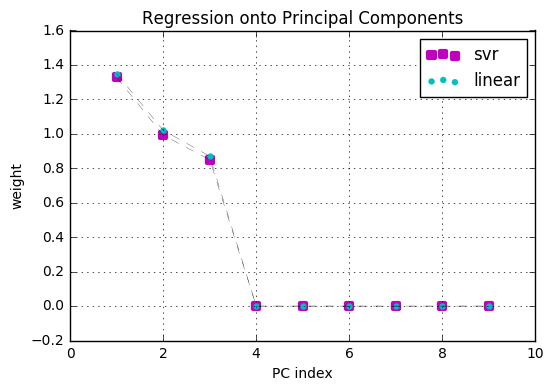

In [89]:
plt.plot(n,m, 'k--',color= 'k', lw=0.2)
plt.scatter(n,m, color='m', marker='s', label='svr',lw=3)
plt.hold('on')
plt.plot(n, l, 'k--', color='k', lw=0.2)
plt.scatter(n, l, color='c', marker='o', label='linear', lw=0.09)
plt.title('Regression onto Principal Components')
plt.xlabel('PC index')
plt.ylabel('weight')
plt.legend()
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.0, 1.0), bbox_transform=ax.transAxes)
plt.grid()
plt.show()